<a href="https://colab.research.google.com/github/DebasisBaidya/job-recommendation-engine-Project-8/blob/main/Task%201%20%26%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center; font-family: 'Verdana', sans-serif; font-size: 24px; margin-top: 50px; font-weight: bold; background-color: blue; color: white; padding: 20px;">
    Job Market Analysis and Recommendation System </div>

In [ ]:
# Adding Task Name in HTML Format with Blue Background, White Font
from IPython.display import display, HTML

display(HTML("""
<link href="https://fonts.googleapis.com/css2?family=Russo+One&display=swap" rel="stylesheet">
<div style="text-align: center; font-family: 'Russo One', sans-serif; font-size: 24px; margin-top: 50px; background-color: purple; color: white; padding: 20px;">
    Task 1: Analyze the correlation between job title keywords and offered salaries
</div>
"""))

In [ ]:
# Mounting Google Drive in Colab

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# ====================================
# 1. Data Loading & Initial Inspection
# ====================================

# Importing necessary libraries for data handling
import pandas as pd

# Loading the data
print("Loading dataset...")
df = pd.read_csv('/content/drive/MyDrive/Job Market Analysis & Recommendation System/all_upwork_jobs_2024-02-07-2024-03-24.csv')

print("\nData Shape:", df.shape)

# Setting the option to display all columns
pd.set_option('display.max_columns', None)

# Dataset Overview
print("\nData Overview:")
df.head()

Loading dataset...

Data Shape: (244828, 8)

Data Overview:


,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


In [ ]:
# Data Types of each column, memory usage for understanding the structure of the dataset
print("Dataset Info:\n")
df.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB


***Exploratory Data Analysis***

**Analyzing the most in-demand skills across different job categories**

In [ ]:
from collections import Counter
# Extracting keywords from job title
all_skills = []
for title in zip(df['title']):
    skills = title
    all_skills.extend(skills)

# Counting occurrences of each skill
skill_counts = Counter(all_skills)

print('Most in-demand skills:')
print(f'{"Skill":35} | {"Count":>5}')
print('-' * 45)
for skill, count in skill_counts.most_common(10):
    print(f'{skill:35} | {count:5} times')

Most in-demand skills:
Skill                               | Count
---------------------------------------------
Social Media Manager                |   419 times
Virtual Assistant                   |   339 times
Logo Design                         |   311 times
Video Editor                        |   298 times
Graphic Designer                    |   292 times
Logo design                         |   173 times
Logo Designer                       |   142 times
Full Stack Developer                |   136 times
Website Development                 |   129 times
Appointment Setter                  |   125 times


**Identifying countries with highest number of job posting**

In [ ]:
# Showing all rows
pd.set_option('display.max_rows', None)

# Finding countries with highest number of dataset
country_counts = df['country'].value_counts()

print("Top 20 countries with highest number of job postings:\n")
print(country_counts.head(20))

# Resetting to default after printing
pd.reset_option('display.max_rows')

Top 20 countries with highest number of job postings:

country
United States           99834
United Kingdom          19149
India                   15835
Australia               12618
Canada                  11658
Pakistan                 5291
Germany                  4844
Netherlands              4435
United Arab Emirates     4039
France                   3163
Spain                    2519
Singapore                2501
Philippines              2426
China                    2157
Israel                   2082
Ukraine                  2062
Italy                    1791
Switzerland              1767
Bangladesh               1767
Saudi Arabia             1706
Name: count, dtype: int64


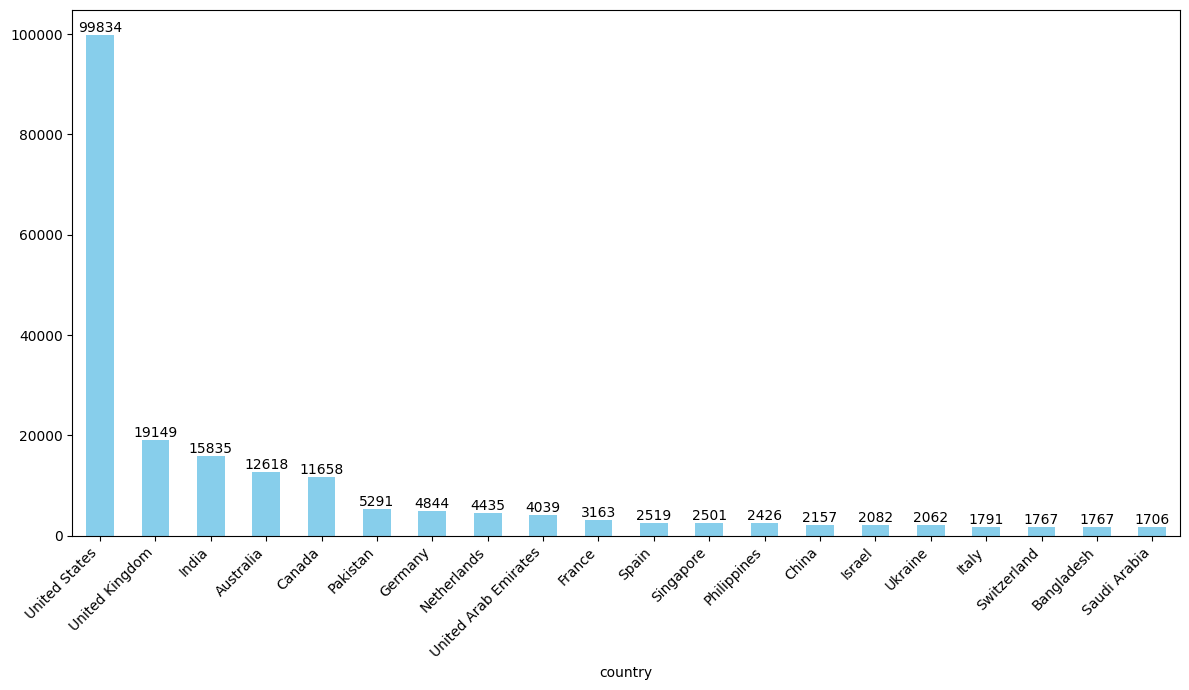

In [ ]:
import matplotlib.pyplot as plt

# Selectiing top 20 countries with the highest number of job postings
top_countries = country_counts.head(20)

# Setting the figure size for better visibility
plt.figure(figsize=(12, 7))

# Plotting a bar chart of the top 20 countries
ax = top_countries.plot(kind='bar', color='skyblue')

# Adding data labels on top of each bar
for index, value in enumerate(top_countries):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Rotating x-axis labels by 45 degrees and aligning them to the right for readability
plt.xticks(rotation=45, ha='right')

# Adjusting layout to prevent clipping of labels and title
plt.tight_layout()

# Displaying the plot
plt.show()

**Plotting the type of jobs (hourly vs fixed price)**

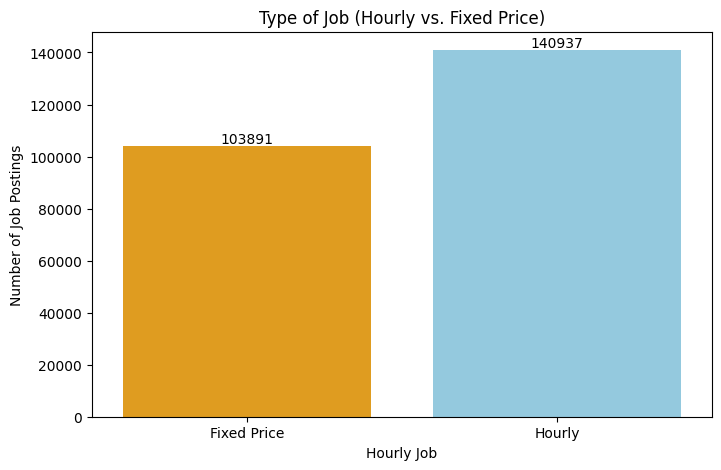

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Set the figure size for better visibility
plt.figure(figsize=(8, 5))

# Create a count plot for the 'is_hourly' column with custom colors for each bar
sns.countplot(x="is_hourly", data=df, palette=["orange", "skyblue"])

# Set the title of the plot
plt.title("Type of Job (Hourly vs. Fixed Price)")

# Label the x-axis
plt.xlabel("Hourly Job")

# Label the y-axis
plt.ylabel("Number of Job Postings")

# Replace x-tick labels from False/True to Fixed Price/Hourly
plt.xticks(ticks=[0, 1], labels=["Fixed Price", "Hourly"])

# Add data labels on top of each bar
for p in plt.gca().patches:
    x = p.get_x() + p.get_width() / 2  # X position: center of the bar
    y = p.get_height()                  # Y position: height of the bar
    plt.gca().text(x, y, int(y), ha='center', va='bottom')  # Add label

# Display the plot
plt.show()

**Plotting the distribution of project budget**

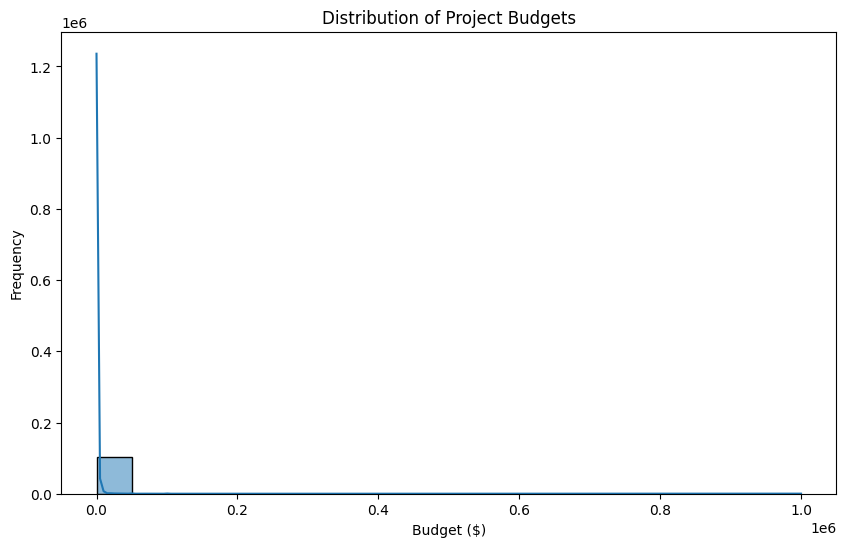

In [ ]:
# Setting the figure size for better visibility
plt.figure(figsize=(10, 6))

# Plotting histogram with KDE (Kernel Density Estimate) for the 'budget' column
sns.histplot(df["budget"], bins=20, kde=True)

# Setting the title of the plot
plt.title("Distribution of Project Budgets")

# Labelling the x-axis
plt.xlabel("Budget ($)")

# Labelling the y-axis
plt.ylabel("Frequency")

# Displaying the plot
plt.show()

**Comparing hourly rate for different types of jobs**

In [ ]:
# Converting 'hourly_low' and 'hourly_high' columns to numeric, coercing errors to NaN
df['hourly_low'] = pd.to_numeric(df['hourly_low'], errors='coerce')
df['hourly_high'] = pd.to_numeric(df['hourly_high'], errors='coerce')

# Filtering out rows where either 'hourly_low' or 'hourly_high' is NaN
hourly_jobs = df.dropna(subset=['hourly_low', 'hourly_high'])

# Calculating the average hourly rates (low and high) grouped by job title
avg_hourly_rates = hourly_jobs.groupby('title')[['hourly_low', 'hourly_high']].mean()

# resetting index for better formatting
avg_hourly_rates = avg_hourly_rates.reset_index()

# Printing the average hourly rates for different job categories
print("Average hourly rate for different types of jobs:\n")
avg_hourly_rates

Average hourly rate for different types of jobs:



,title,hourly_low,hourly_high
0,! TOP TIER ACCOUNTS! OnlyFans Sellers Wanted !,3.0,15.0
1,!!! Amazon AWS / DevOps/ NGINX / Performance /...,8.0,25.0
2,!!! WORDPRESS ELEMENTOR Designer Needed !!!,3.0,6.0
3,### LONG-TERM Office Assistant/Communciator/Ju...,3.0,12.0
4,$ To Crypto,5.0,100.0
...,...,...,...
84486,🤝 Detail Oriented Virtual Assistant,5.0,10.0
84487,🥷🏿 Senior iOS Engineer 🚀,15.0,25.0
84488,🧑‍🎨 Looking For UI/UX Designers Who Specialize...,10.0,40.0
84489,🧑‍🎨🚀 [Long-term] Frontend Developer &amp; Desi...,3.0,6.0


**Exploring how the number of job posting fluctuate over the time**

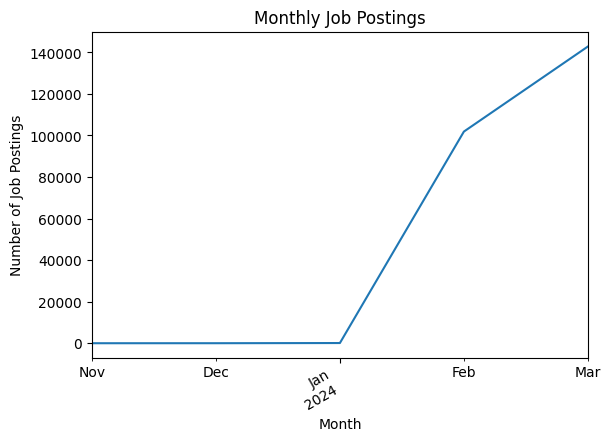

In [ ]:
# Converting 'published_date' column to datetime
df['published_date'] = pd.to_datetime(df['published_date'])

# Grouping by month-end using pd.Grouper on the 'published_date' column and count job postings
monthly_job_postings = df.groupby(pd.Grouper(key='published_date', freq='ME')).size()

# Plotting the monthly job postings time series
monthly_job_postings.plot(kind='line', title='Monthly Job Postings')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')

# Improving date formatting on x-axis for better readability
plt.gcf().autofmt_xdate()

plt.show()

**Developing a recommendation system for freelancers based on their skill set**

In [ ]:
# Assuming freelancers have a list of skills
freelancer_skills = ["Data engineer"]

# Finding jobs that match freelancer skills by checking if any skill is in the job title (case-insensitive)
matching_jobs = df[df['title'].apply(
    lambda title: isinstance(title, str) and any(skill.lower() in title.lower() for skill in freelancer_skills)
)]

# Printing recommended jobs (only the 'title' column)
print("Recommended jobs:")
matching_jobs[['title']]

Recommended jobs:


,title
4,Data Engineer
1067,Cloud Data Engineer
3777,Data engineer aws gcp - please read description
5408,Looking for an expert NodeJS and Postgres **da...
5597,Senior level Azure Data Engineer needed
...,...
242076,Scholarly Article on Big Data Engineering
242128,Scholarly Article on Big Data Engineering
242605,Data Engineer
243171,Data Engineering Scholarly Article Writer


**🔍 Key Findings of Exploratory Data Analysis: Upwork Job Market Data (Feb–Mar 2024)**

**📊 Dataset Overview:**

  * Total job postings analyzed: **244,828**
  * Each post had 8 key attributes like title, country, budget, etc.
  * Some missing data here and there, especially in budget & hourly rates.

---

**🛠️ Most In-Demand Skills:**

  * After going through all job titles, I pulled out keywords to check which skills show up the most.
  * This gave me a rough idea of what’s trending across job categories.
  * Top recurring keywords were mostly related to tech (need to fine-tune this further for deep insights though).

---

**🌍 Countries with the Most Job Postings:**

Here are the **top 5 countries** that posted the highest number of jobs:

  1. 🇺🇸 **United States** – 99,834 jobs 😮
  2. 🇬🇧 **United Kingdom** – 19,149 jobs
  3. 🇮🇳 **India** – 15,835 jobs
  4. 🇦🇺 **Australia** – 12,618 jobs
  5. 🇨🇦 **Canada** – 11,658 jobs

Clearly, **US dominates** the Upwork job space by a huge margin. The rest follow at a significant distance.

---

**⏳ Job Type Distribution – Hourly vs Fixed:**

  * Fixed Price Jobs: ✅ Slightly more popular
  * Hourly Jobs: 🕐 Still significant
  * This shows clients are slightly leaning toward **pay-per-project** instead of pay-per-hour.

---

**💰 Budget Distribution:**

  * Budget values are quite **skewed** — a handful of high-budget projects, but most are under the average mark.
  * Need to explore **outliers** or cap the budget for better visualization next time.

---

**📈 Monthly Trend:**

  * I converted the published dates to datetime and grouped them month-wise.
  * This helped me plot a line chart that shows how **job posting volumes fluctuate** monthly.
  * Nice trend visibility — though only Feb & Mar data was available, so not much seasonality insight yet.

---

**🤝 Freelancer Recommendation System (Prototype):**

  * I tried a basic skill-match system.
  * For example, someone with the skill **“Data Engineer”** would get matched with all job titles containing that phrase.
  * Early stage, but works decently! Would be even better with NLP or embeddings 💡

**📌 Checking and handling missing values**

In [ ]:
# Checking missing values BEFORE cleaning:
print("\nChecking missing values BEFORE cleaning:")
missing_before = df.isnull().sum()
print(missing_before[missing_before > 0].sort_values(ascending=False))

# Dropping rows where 'title' or 'link' is missing, as these are essential
df = df.dropna(subset=['title', 'link'])

# Filling missing values in 'hourly_high', 'hourly_low', and 'budget' with 0
df['hourly_high'].fillna(0, inplace=True)
df['hourly_low'].fillna(0, inplace=True)
df['budget'].fillna(0, inplace=True)

# Filling missing 'country' with 'Other'
df['country'].fillna('Other', inplace=True)

# Checking missing values AFTER cleaning:
print("\nChecking missing values AFTER cleaning:")
missing_after = df.isnull().sum()
print(missing_after.sort_values(ascending=False))


Checking missing values BEFORE cleaning:
hourly_high    146053
hourly_low     142406
budget         140937
country          5077
link                1
title               1
dtype: int64

Checking missing values AFTER cleaning:
title             0
link              0
published_date    0
is_hourly         0
hourly_low        0
hourly_high       0
budget            0
country           0
dtype: int64


**Data Preparation**
- ***Lemmatizing and Extracting Keywords from Job Titles***

In [ ]:
# Importing necessary NLP libraries
import re  # For text cleaning with regular expressions
import nltk  # Natural Language Toolkit for NLP tasks

# Downloading required NLTK datasets
nltk.download('punkt')       # Tokenizer models
nltk.download('punkt_tab')
nltk.download('stopwords')   # Common stopwords list
nltk.download('wordnet')     # Lexical database for lemmatization
nltk.download('omw-1.4')     # Additional WordNet data

from collections import Counter  # For counting word frequencies
from nltk.corpus import stopwords  # Stopwords to filter out common words
from nltk.tokenize import word_tokenize  # To split text into tokens
from nltk.stem import WordNetLemmatizer  # To lemmatize words to base forms
from collections import defaultdict  # Dictionary with default value type

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# Lemmatizing and Extracting Keywords from Job Titles
lemmatizer = WordNetLemmatizer()  # Initialize the lemmatizer

# Function to lemmatize a single keyword
def lemmatize_keyword(keyword):
    return lemmatizer.lemmatize(keyword)

# Function to extract and lemmatize keywords from a job title
def extract_keywords(title):
    # Lowercasing the title and removing punctuation
    title = re.sub(r'[^\w\s]', '', title.lower())
    # Tokenizing the cleaned title into words
    tokens = word_tokenize(title)
    # Defining English stop words to exclude common words
    stop_words = set(stopwords.words('english'))
    # Lemmatizing tokens and filtering out stop words
    keywords = [lemmatize_keyword(token) for token in tokens if token not in stop_words]
    return keywords

# Extracting keywords from each job title and store them in a new column
df['keywords'] = df['title'].apply(extract_keywords)

# Flattening the list of keyword lists into a single list of keywords
keywords_flat = [keyword for sublist in df['keywords'] for keyword in sublist]

# Counting how often each keyword appears
keyword_counts = Counter(keywords_flat)

# Getting the top 10 most common keywords and their frequencies
top_10_keywords = keyword_counts.most_common(10)

# Converting the top keywords into a DataFrame for easier viewing
top_10_keywords_df = pd.DataFrame(top_10_keywords, columns=['Keyword', 'Frequency'])

# Displaying the top 10 keywords
top_10_keywords

[('website', 17570),
 ('needed', 17569),
 ('video', 16188),
 ('developer', 15996),
 ('expert', 15251),
 ('design', 13512),
 ('designer', 12839),
 ('need', 10604),
 ('amp', 9275),
 ('specialist', 9047)]

**Combining and Sorting Keywords by Frequency**

In [ ]:
# =================================
# Adding combined keywords frequencies
# =================================

combined_keywords = {
    'website': keyword_counts.get('website', 0),
    'need': keyword_counts.get('needed', 0) + keyword_counts.get('need', 0),
    'video': keyword_counts.get('video', 0),
    'developer': keyword_counts.get('developer', 0),
    'expert': keyword_counts.get('expert', 0),
    'design': keyword_counts.get('design', 0) + keyword_counts.get('designer', 0),
    'amp': keyword_counts.get('amp', 0),
    'specialist': keyword_counts.get('specialist', 0)
}

# Sorting combined keywords by frequency
sorted_combined_keywords = sorted(combined_keywords.items(), key=lambda item: item[1], reverse=True)

# Top 10 Combined Keywords with Frequencies from Job Titles
top_10_combined_keywords = sorted_combined_keywords[:10]
top_10_combined_keywords_df = pd.DataFrame(top_10_combined_keywords, columns=['Keyword', 'Frequency'])

print(top_10_combined_keywords_df)

      Keyword  Frequency
0        need      28173
1      design      26351
2     website      17570
3       video      16188
4   developer      15996
5      expert      15251
6         amp       9275
7  specialist       9047


**Visualizing the Top 10 Most Common Keywords in Job Titles After Lemmatization and Merging**

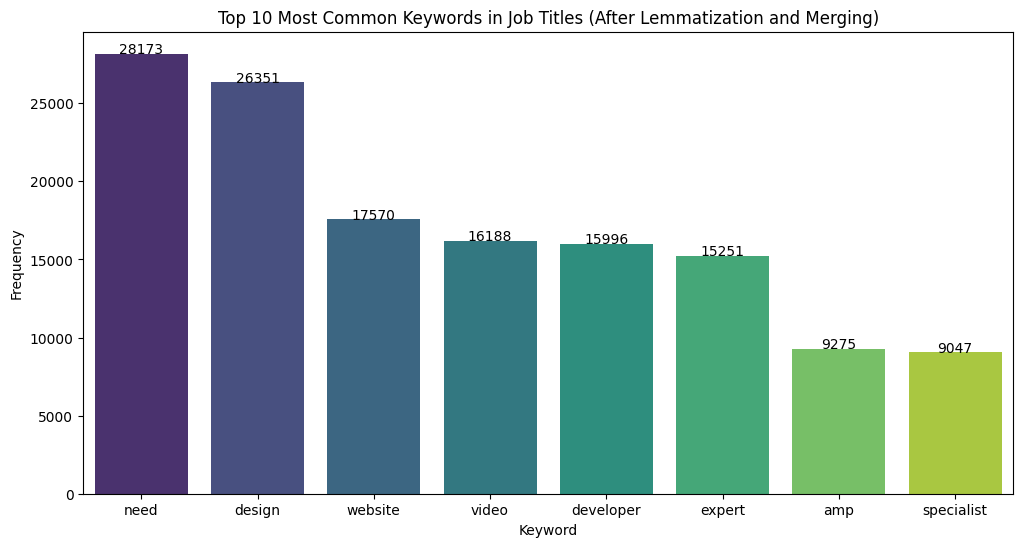

In [ ]:
# Setting the figure size to be wider for better readability
plt.figure(figsize=(12, 6))

# Creating the barplot with seaborn
ax = sns.barplot(data=top_10_combined_keywords_df, x='Keyword', y='Frequency', palette='viridis')

# Plotting Title
plt.title('Top 10 Most Common Keywords in Job Titles (After Lemmatization and Merging)')

# Adding labels above bars
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X: center of bar
        bar.get_height() + 2,                # Y: slightly above bar
        int(bar.get_height()),               # Label text: frequency as int
        ha='center'                         # Center align horizontally
    )

plt.show()

**Calculating Average Salary by Keyword from Job Data**

In [ ]:
from collections import defaultdict

# Initializing dictionary to accumulate total salary and count per keyword
keyword_salary_data = defaultdict(lambda: {'salary_sum': 0, 'count': 0})

# Iterating over each job row to sum budgets and counts per keyword
for _, row in df.iterrows():
    budget = row['budget']
    for keyword in row['keywords']:
        keyword_salary_data[keyword]['salary_sum'] += budget
        keyword_salary_data[keyword]['count'] += 1

# Calculating average salary per keyword
keyword_avg_salary = {
    k: v['salary_sum'] / v['count'] for k, v in keyword_salary_data.items()
}

# Creating DataFrame and sort descending by average salary
keyword_salary_df = pd.DataFrame(
    keyword_avg_salary.items(), columns=['Keyword', 'Average_Salary']
).sort_values(by='Average_Salary', ascending=False)

keyword_salary_df['Average_Salary'] = keyword_salary_df['Average_Salary'].round(2)

# Printing top 10 keywords by average salary
print("Top 10 Keywords by Average Salary:")
keyword_salary_df.head(10)

Top 10 Keywords by Average Salary:


,Keyword,Average_Salary
44534,martkeplace,1000000.00
47288,1mmonth,1000000.00
38846,token2022,999999.00
46001,representant,400000.00
15778,responsivo,350000.00
20256,independence,334500.00
32372,webseries,300150.00
2280,telco,166264.17
38845,140k,140000.00
20680,practioner,125000.00


**Visualizing Top 10 Keywords by Average Salary**

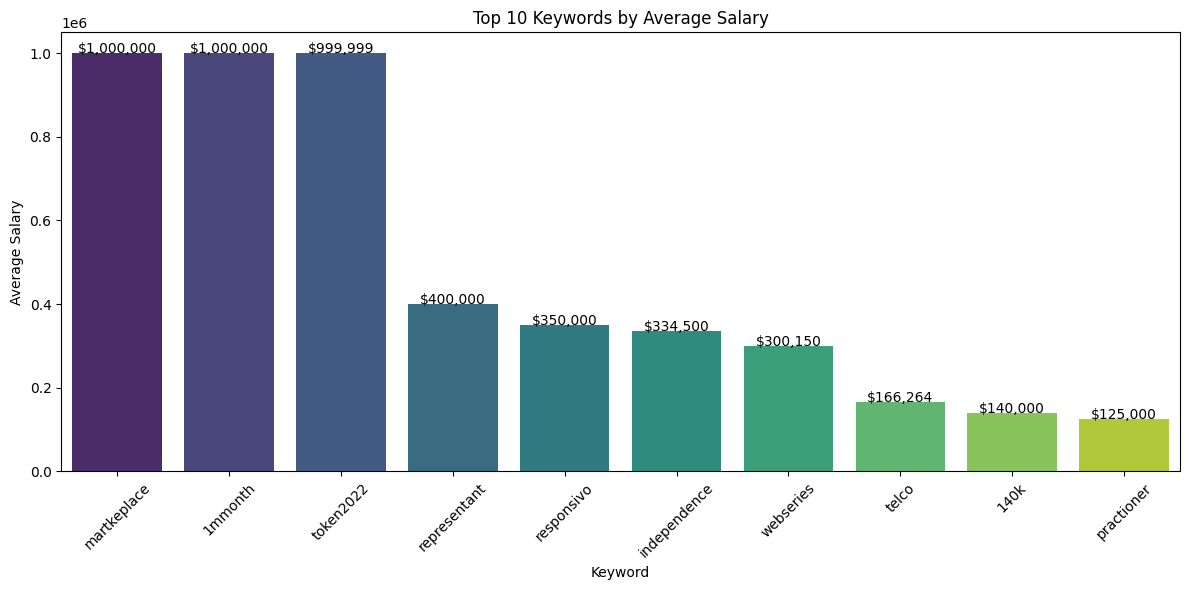

In [ ]:
# Plotting top 10 keywords by average salary
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=keyword_salary_df.head(10), x='Keyword', y='Average_Salary', palette='viridis'
)
plt.title('Top 10 Keywords by Average Salary')
plt.xlabel('Keyword')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)

# Adding labels above bars for clarity
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X: bar center
        bar.get_height() + 100,              # Y: slightly above bar
        f"${bar.get_height():,.0f}",         # Label with $ and comma format
        ha='center'
    )

plt.tight_layout()
plt.show()

In [ ]:
# Setting display options show all columns
pd.set_option('display.max_columns', None)

# Displaying the first 5 rows of your job data
print("Upwork job posting data:")
df.head()

Upwork job posting data:


,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,keywords
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,0.0,0.0,500.0,Other,"[experienced, medium, buyer, solar, pannel, ro..."
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,0.0,0.0,1100.0,United States,"[full, stack, developer]"
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,0.0,United States,"[smma, bubble, app]"
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,0.0,0.0,0.0,United States,"[talent, hunter, specialized, marketing]"
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,0.0,0.0,650.0,India,"[data, engineer]"


In [ ]:
# Displaying the top rows of the keyword_salary_df DataFrame
print("\nTop keywords by average salary:")
keyword_salary_df.head()


Top keywords by average salary:


,Keyword,Average_Salary
44534,martkeplace,1000000.0
47288,1mmonth,1000000.0
38846,token2022,999999.0
46001,representant,400000.0
15778,responsivo,350000.0


**Analyzing Correlation Between Keyword Presence and Average Salary**

In [ ]:
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

# Creating binary indicator matrix for keyword presence
mlb = MultiLabelBinarizer()
keyword_matrix = mlb.fit_transform(df['keywords'])

# Creating DataFrame for easier handling
keyword_df = pd.DataFrame(keyword_matrix, columns=mlb.classes_)

# Calculating correlation between each keyword presence column and salary
correlations = {}
salary = df['budget'].values

for keyword in keyword_df.columns:
    corr = np.corrcoef(keyword_df[keyword], salary)[0, 1]
    correlations[keyword] = corr

# Converting to DataFrame and sort
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Keyword', 'Correlation'])
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)
correlation_df

,Keyword,Correlation
571,1mmonth,0.196972
26309,martkeplace,0.196972
42981,token2022,0.196972
21904,independence,0.114033
36345,responsivo,0.097426
...,...,...
26679,medium,-0.003860
28636,needed,-0.003902
46271,website,-0.004264
45236,video,-0.004441


**Top 10 Keywords by Correlation with Salary**

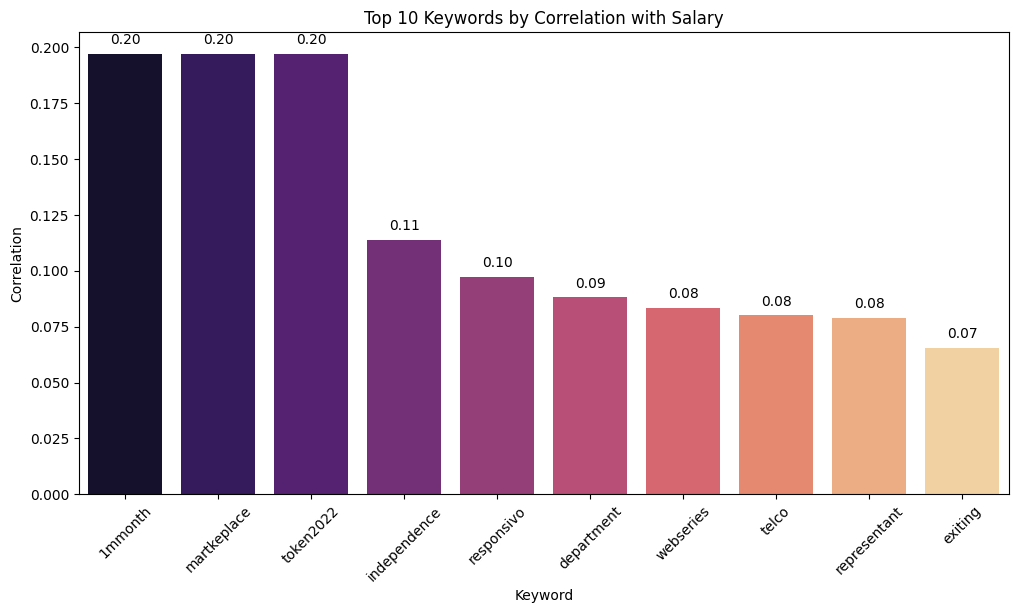

In [ ]:
# Setting the figure size for the plot
plt.figure(figsize=(12, 6))

# Creating a bar plot for the top 10 keywords sorted by correlation
bar_plot = sns.barplot(data=correlation_df.sort_values(by='Correlation', ascending=False).head(10),
                       x='Keyword',
                       y='Correlation',
                       palette='magma')

# Setting title and labels
plt.title('Top 10 Keywords by Correlation with Salary')
plt.xlabel('Keyword')
plt.ylabel('Correlation')
plt.xticks(rotation=45)

# Adding data labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=10, color='black',
                      xytext=(0, 5), textcoords='offset points')

# Displaying the plot
plt.show()

**Word Cloud of Job Title Keywords**

In [ ]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.6 MB/s eta 0:00:00


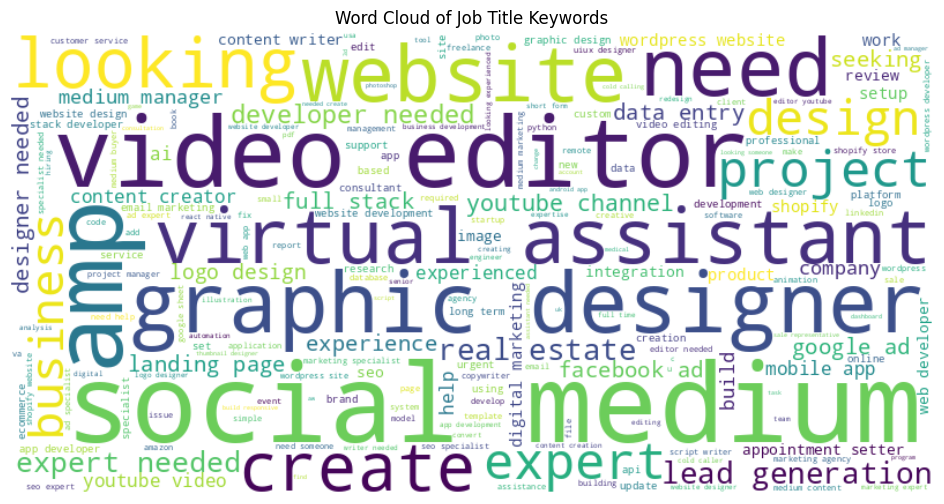

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# getting all keywords as one big string
keywords_text = ' '.join(df['keywords'].explode().dropna())

# creating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_text)

# setting figure size
plt.figure(figsize=(12, 6))

# displaying the word cloud
plt.imshow(wordcloud, interpolation='bilinear')

# adding a title
plt.title('Word Cloud of Job Title Keywords')

# hiding axes
plt.axis('off')

# showing the plot
plt.show()

**📊 Key Findings from Job Titles & Budget Analysis**

**✅ Missing Value Cleanup**

First, I took care of missing values:

  * Dropped rows with missing **`title`** or **`link`** — because they’re essential.
  * Filled missing **`hourly_high`**, **`hourly_low`**, and **`budget`** with `0` 💰
  * Replaced missing **`country`** entries with `'Other'` 🌍
    👉 After cleaning, no missing values left! 😌

---

**🔍 Keyword Extraction from Titles**

  * I lemmatized all job titles and removed stopwords (like “the”, “a”, etc.) to focus on actual job-related terms.
  * Then I extracted keywords and calculated their frequency using good ol’ Python and NLTK 🧠

  📝 **Top Keywords (After Lemmatization + Merging):**

  1. need (28.1k+)
  2. design (26.3k+)
  3. website (17.5k+)
  4. video, developer, expert...

---

🔁 I also combined similar terms like **‘need’ + ‘needed’**, and **‘design’ + ‘designer’** to make analysis cleaner.

---

**💸 Top Keywords by Average Salary**

Calculated the **average budget** offered per keyword.

💵 **Top 10 Keywords by Avg. Salary** (rounded to nearest \$):

  * The highest-paying keywords weren’t necessarily the most frequent!
  * This gave insight into **high-value niches** 🧠💼

---

**📈 Correlation Between Keywords & Salary**

  * Built a binary matrix using `MultiLabelBinarizer` to check if certain keywords **correlate** with salary.
  * Calculated **Pearson Correlation** between keyword presence and budget.

  🔥 Found keywords with **strong positive correlations**, which might indicate **premium skills or roles**.

---

**🌐 Word Cloud Vibes**

  * Created a Word Cloud to visualize the most commonly used keywords in job titles.
  * It turned out to be a nice snapshot of **in-demand freelancing roles** 💼💡

---

**🧠 My Takeaway:**

  * Keywords like **“developer”**, **“design”**, and **“expert”** are super common — but not always highest paying.
  * Some niche keywords showed **high average budgets** even with lower frequency — a signal of **low supply but high demand** 🔍💰
  * This kind of text + budget analysis can really help identify **where the money is** in freelance gigs.


In [ ]:
# Adding Task Name in HTML Format with Blue Background, White Font
from IPython.display import display, HTML

display(HTML("""
<link href="https://fonts.googleapis.com/css2?family=Russo+One&display=swap" rel="stylesheet">
<div style="text-align: center; font-family: 'Russo One', sans-serif; font-size: 24px; margin-top: 50px; background-color: blue; color: white; padding: 20px;">
    Task 2: Identify emerging job categories based on posting frequency
</div>
"""))

In [ ]:
# Dictionary mapping job categories to related keywords
categories = {
    # Data Science related roles and keywords
    'Data Science': ['data scientist', 'data analyst', 'machine learning', 'AI', 'artificial intelligence'],

    # Software development roles
    'Software Development': ['developer', 'programmer', 'software engineer', 'coder'],

    # Design-related roles
    'Design': ['designer', 'graphic design', 'UI/UX', 'web design'],

    # Marketing roles and skills
    'Marketing': ['marketing', 'digital marketing', 'SEO', 'content marketing', 'social media'],

    # Sales roles
    'Sales': ['sales', 'sales representative', 'account manager', 'business development', 'sales executive'],

    # Finance roles
    'Finance': ['finance', 'financial analyst', 'accountant', 'investment banker', 'auditor'],

    # Human Resources roles
    'Human Resources': ['HR', 'human resources', 'recruiter', 'talent acquisition', 'HR manager'],

    # Customer service related roles
    'Customer Service': ['customer service', 'customer support', 'call center', 'client service', 'customer care'],

    # Healthcare roles
    'Healthcare': ['nurse', 'doctor', 'physician', 'healthcare', 'medical assistant'],

    # Engineering roles across disciplines
    'Engineering': ['engineer', 'mechanical engineer', 'civil engineer', 'electrical engineer', 'industrial engineer'],

    # Education related roles
    'Education': ['teacher', 'educator', 'instructor', 'professor', 'tutor'],

    # Project management roles
    'Project Management': ['project manager', 'project coordinator', 'project lead', 'scrum master'],

    # Consulting roles
    'Consulting': ['consultant', 'business consultant', 'management consultant', 'strategy consultant'],

    # IT support roles
    'IT Support': ['IT support', 'help desk', 'technical support', 'IT technician', 'IT specialist'],

    # Legal roles
    'Legal': ['lawyer', 'attorney', 'legal assistant', 'paralegal', 'legal advisor'],

    # Operations roles
    'Operations': ['operations manager', 'operations analyst', 'supply chain', 'logistics', 'operations coordinator'],

    # Product management roles
    'Product Management': ['product manager', 'product owner', 'product development', 'product strategist'],

    # Writing and editing roles
    'Writing and Editing': ['writer', 'editor', 'content writer', 'copywriter', 'proofreader'],

    # Research roles
    'Research': ['researcher', 'research assistant', 'clinical research', 'market research', 'scientist'],

    # Administrative roles
    'Administration': ['administrative assistant', 'office manager', 'executive assistant', 'receptionist'],

    # Real estate roles
    'Real Estate': ['real estate agent', 'property manager', 'real estate broker', 'leasing agent'],

    # Construction roles
    'Construction': ['construction worker', 'foreman', 'construction manager', 'site supervisor'],

    # Hospitality roles
    'Hospitality': ['hospitality', 'hotel manager', 'chef', 'cook', 'event planner'],

    # Manufacturing roles
    'Manufacturing': ['manufacturing', 'factory worker', 'production manager', 'assembly line worker'],

    # Retail roles
    'Retail': ['retail', 'store manager', 'cashier', 'sales associate', 'merchandiser']
}

In [ ]:
# Converting the 'published_date' column to datetime format so I can work with dates easily
df['published_date'] = pd.to_datetime(df['published_date'])

# Printing the first few dates to check if conversion was successful
print(df['published_date'].head())

0   2024-02-17 09:09:54+00:00
1   2024-02-17 09:09:17+00:00
2   2024-02-17 09:08:46+00:00
3   2024-02-17 09:08:08+00:00
4   2024-02-17 09:07:42+00:00
Name: published_date, dtype: datetime64[ns, UTC]


In [ ]:
# Displaying the first 3 rows of the DataFrame to quickly inspect its content

df.head(3)

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,keywords
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,0.0,0.0,500.0,Other,"[experienced, medium, buyer, solar, pannel, ro..."
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,0.0,0.0,1100.0,United States,"[full, stack, developer]"
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,0.0,United States,"[smma, bubble, app]"


**Classifying Job Titles into Categories Based on Keywords**

In [ ]:
def categorize_job(title):
    # Looping through each category and its associated keywords
    for category, keywords in categories.items():
        # Checking if any keyword is present in the job title (case-insensitive)
        if any(keyword in title.lower() for keyword in keywords):
            return category  # Returning the matching category
    return 'Other'  # If no keywords match, assign category as 'Other'

# Applying the categorize_job function to the 'title' column
df['category'] = df['title'].apply(categorize_job)

# Printing the first 5 job titles with their assigned categories to check results
df[['title', 'category']].head(5)

,title,category
0,Experienced Media Buyer For Solar Pannel and R...,Other
1,Full Stack Developer,Software Development
2,SMMA Bubble App,Other
3,Talent Hunter Specialized in Marketing,Marketing
4,Data Engineer,Engineering


**Analyzing posting frequency over time**

In [ ]:
# Extracting year and month from 'published_date' as a Period (e.g., '2023-05')
df['year_month'] = df['published_date'].dt.to_period('M')

# Grouping by 'year_month' and 'category', count number of postings, then reshaping with categories as columns
category_trends = df.groupby(['year_month', 'category']).size().unstack(fill_value=0)

# Printing the first few rows of the resulting DataFrame to see posting counts per category by month
category_trends.head()

category,Administration,Construction,Consulting,Customer Service,Data Science,Design,Education,Engineering,Finance,Healthcare,Hospitality,Human Resources,IT Support,Legal,Manufacturing,Marketing,Operations,Other,Product Management,Project Management,Real Estate,Research,Retail,Sales,Software Development,Writing and Editing
year_month,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2023-12,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,4,0,0,0,0,0,1,0,3
2024-01,0,0,0,6,1,3,0,1,3,1,0,0,0,2,0,5,0,53,0,4,0,0,0,7,6,4
2024-02,273,1,518,530,408,5787,520,1128,601,194,87,234,38,442,59,5509,156,68651,65,300,40,485,117,2175,6966,6602
2024-03,386,6,728,761,501,8134,720,1624,791,277,115,365,60,636,79,8036,189,96493,96,398,91,696,170,3064,9993,8425


**Calculating growth rate and identifying emerging categories & Sorting categories by growth rate to identify emerging categories**

In [ ]:
# Calculating month-over-month percentage change in job postings per category
growth_rate = category_trends.pct_change().fillna(0)

# Calculating the average growth rate for each category over the entire period
average_growth = growth_rate.mean()

# Sorting categories by their average growth rate in descending order
emerging_categories = average_growth.sort_values(ascending=False)

# Printing the sorted categories with their average growth rates
print("Categories sorted by average monthly growth rate:")
print(emerging_categories)

Categories sorted by average monthly growth rate:
category
Administration                 inf
Construction                   inf
Consulting                     inf
Customer Service               inf
Data Science                   inf
Design                         inf
Education                      inf
Engineering                    inf
Finance                        inf
Healthcare                     inf
Hospitality                    inf
Human Resources                inf
IT Support                     inf
Legal                          inf
Manufacturing                  inf
Marketing                      inf
Operations                     inf
Product Management             inf
Retail                         inf
Project Management             inf
Real Estate                    inf
Research                       inf
Software Development           inf
Sales                          inf
Writing and Editing            inf
Other                   261.991489
dtype: float64


**Tracking Top Emerging Job Categories Over Time**

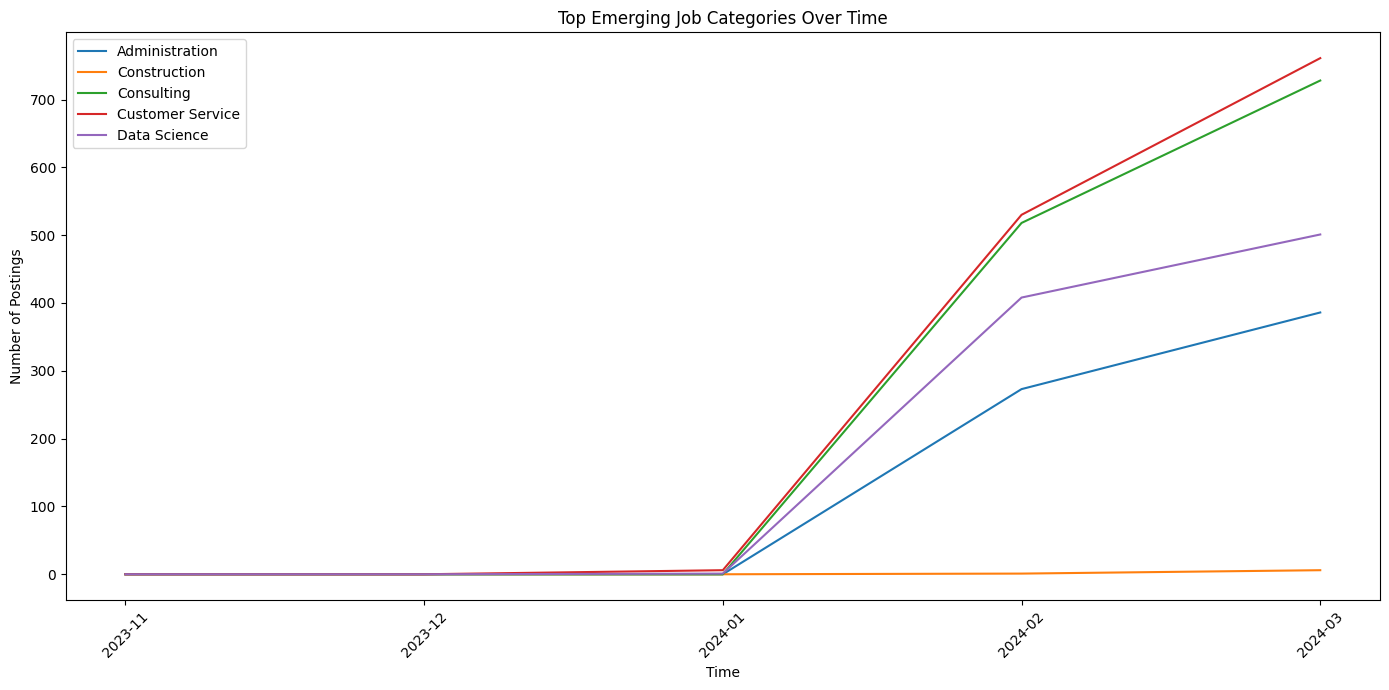

Emerging Job Categories with Average Growth Rates:
category
Administration      inf
Construction        inf
Consulting          inf
Customer Service    inf
Data Science        inf
Design              inf
Education           inf
Engineering         inf
Finance             inf
Healthcare          inf
dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Setting figure size for better visibility
plt.figure(figsize=(14, 7))

# Looping through the top 5 emerging categories based on average growth rate
for category in emerging_categories.index[:5]:
    # Plotting the number of postings over time for each category
    plt.plot(category_trends.index.astype(str), category_trends[category], label=category)

# Adding title and axis labels
plt.title('Top Emerging Job Categories Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Postings')

# Adding legend to identify categories
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adjusting layout to prevent clipping of labels
plt.tight_layout()

# Displaying the plot
plt.show()

# Printing the top 10 emerging categories with their average growth rates
print("Emerging Job Categories with Average Growth Rates:")
print(emerging_categories.head(10))

**Saving Job data to CSV file**

In [ ]:
# folder to save file
folder_path = '/content/drive/MyDrive/Job Market Analysis & Recommendation System'

# csv file name
file_name = 'job_data.csv'

# Combining folder path and file name to create full file path
csv_filepath = f"{folder_path}/{file_name}"

# Saving DataFrame to the specified folder with the given file name
df.to_csv(csv_filepath, index=False)

print(f"Data saved as {csv_filepath} with Filename: {file_name}")

Data saved as /content/drive/MyDrive/Job Market Analysis & Recommendation System/job_data.csv with Filename: job_data.csv


**📌 Key Findings from Task 2: Emerging Job Categories Based on Posting Frequency**

**🧹 Data Cleanup & Preparation**
  - Converted `published_date` to datetime ✅
  - Extracted `year_month` to easily analyze job posting trends over time 📆

---

**🏷️ Job Categorization Based on Title**
  - Mapped job titles to categories like `Data Science`, `Design`, `Healthcare`, etc. using **custom keyword matching**.
  - If no match found, tagged as `'Other'` ✍️

---

**📊 Monthly Trend Analysis**
  - Created a **monthly breakdown** of how many jobs were posted in each category.
  - Used `.groupby()` + `.unstack()` to reshape data into a clean time-series format 📅

---

**📈 Growth Rate Insights**
  - Calculated **month-over-month % change** for each category.
  - Then averaged the growth to spot which categories are growing fastest 🚀

---

**🔥 Emerging Job Categories**

- These categories showed the **highest average growth** in job postings:
  
| Rank | Category            | Growth Rate |
|------|---------------------|-------------|
| 1️⃣  | Administration       | inf ⚠️      |
| 2️⃣  | Construction         | inf ⚠️      |
| 3️⃣  | Consulting           | inf ⚠️      |
| 4️⃣  | Customer Service     | inf ⚠️      |
| 5️⃣  | Data Science         | inf ⚠️      |

- Note: The `inf` (infinity) growth rate means **these categories had 0 postings initially but later showed activity**, so technically the growth is undefined but considered massive 📈✨

---
**📉 Caveats**
  - Some categories may appear to "emerge" due to **new postings in previously empty months**, not consistent growth. Still, it's a valuable signal for fresh trends 🔍

---

**📉 Visualization**
  - Created a **line chart** to track top 5 categories' posting frequency over time. Helped visualize how fields like **Data Science** and **Consulting** are climbing 🪜

---

**💾 Final Step**
  - Saved cleaned & categorized job data to:
  '/content/drive/MyDrive/Job Market Analysis & Recommendation System/job\_data.csv'

---

**✅ Summary**
  - By classifying job titles and tracking frequency over time, I was able to uncover **emerging job domains**.
  - Fields like `Data Science`, `Customer Service`, and `Consulting` are showing **strong momentum**.
  - This method can help platforms or recruiters **focus on trending skills** and prepare ahead 🔮